In [1]:
# 1.获取数据
# 2.数据基本处理
# 2.1 确定特征值,目标值
# 2.2 缺失值处理
# 2.3 数据集划分
# 3.特征工程(字典特征抽取)
# 4.机器学习(xgboost)
# 5.模型评估

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.tree import DecisionTreeClassifier, export_graphviz

In [3]:
# 1.获取数据
titan = pd.read_csv("http://biostat.mc.vanderbilt.edu/wiki/pub/Main/DataSets/titanic.txt")

In [4]:
titan

row.names pclass  survived  \
0             1    1st         1   
1             2    1st         0   
2             3    1st         0   
3             4    1st         0   
4             5    1st         1   
5             6    1st         1   
6             7    1st         1   
7             8    1st         0   
8             9    1st         1   
9            10    1st         0   
10           11    1st         0   
11           12    1st         1   
12           13    1st         1   
13           14    1st         1   
14           15    1st         0   
15           16    1st         1   
16           17    1st         0   
17           18    1st         0   
18           19    1st         1   
19           20    1st         1   
20           21    1st         1   
21           22    1st         0   
22           23    1st         1   
23           24    1st         1   
24           25    1st         1   
25           26    1st         0   
26           27    1st         1   
27           28    1st         1   
28           29    1st         1   
29           30    1st         0   
...         ...    ...       ...   
1283       1284    3rd         0   
1284       1285    3rd         0   
1285       1286    3rd         0   
1286       1287    3rd         0   
1287       1288    3rd         0   
1288       1289    3rd         0   
1289       1290    3rd         1   
1290       1291    3rd         0   
1291       1292    3rd         0   
1292       1293    3rd         0   
1293       1294    3rd         1   
1294       1295    3rd         0   
1295       1296    3rd         0   
1296       1297    3rd         0   
1297       1298    3rd         0   
1298       1299    3rd         0   
1299       1300    3rd         0   
1300       1301    3rd         0   
1301       1302    3rd         0   
1302       1303    3rd         1   
1303       1304    3rd         0   
1304       1305    3rd         1   
1305       1306    3rd         0   
1306       1307    3rd         0   
1307       1308    3rd         0   
1308       1309    3rd         0   
1309       1310    3rd         0   
1310       1311    3rd         0   
1311       1312    3rd         0   
1312       1313    3rd         0   

                                                  name      age     embarked  \
0                         Allen, Miss Elisabeth Walton  29.0000  Southampton   
1                          Allison, Miss Helen Loraine   2.0000  Southampton   
2                  Allison, Mr Hudson Joshua Creighton  30.0000  Southampton   
3      Allison, Mrs Hudson J.C. (Bessie Waldo Daniels)  25.0000  Southampton   
4                        Allison, Master Hudson Trevor   0.9167  Southampton   
5                                   Anderson, Mr Harry  47.0000  Southampton   
6                     Andrews, Miss Kornelia Theodosia  63.0000  Southampton   
7                               Andrews, Mr Thomas, jr  39.0000  Southampton   
8         Appleton, Mrs Edward Dale (Charlotte Lamson)  58.0000  Southampton   
9                               Artagaveytia, Mr Ramon  71.0000    Cherbourg   
10                           Astor, Colonel John Jacob  47.0000    Cherbourg   
11    Astor, Mrs John Jacob (Madeleine Talmadge Force)  19.0000    Cherbourg   
12                        Aubert, Mrs Leontine Pauline      NaN    Cherbourg   
13                           Barkworth, Mr Algernon H.      NaN  Southampton   
14                                 Baumann, Mr John D.      NaN  Southampton   
15      Baxter, Mrs James (Helene DeLaudeniere Chaput)  50.0000    Cherbourg   
16                             Baxter, Mr Quigg Edmond  24.0000    Cherbourg   
17                                 Beattie, Mr Thomson  36.0000    Cherbourg   
18                        Beckwith, Mr Richard Leonard  37.0000  Southampton   
19     Beckwith, Mrs Richard Leonard (Sallie Monypeny)  47.0000  Southampton   
20                                Behr, Mr Karl Howell  26.0000    Cherbourg   
21           

In [5]:
titan.describe()

row.names     survived         age
count  1313.000000  1313.000000  633.000000
mean    657.000000     0.341965   31.194181
std     379.174762     0.474549   14.747525
min       1.000000     0.000000    0.166700
25%     329.000000     0.000000   21.000000
50%     657.000000     0.000000   30.000000
75%     985.000000     1.000000   41.000000
max    1313.000000     1.000000   71.000000

In [6]:
# 2.数据基本处理
# 2.1 确定特征值,目标值
x = titan[["pclass", "age", "sex"]]
y = titan["survived"]

In [7]:
x.head()

pclass      age     sex
0    1st  29.0000  female
1    1st   2.0000  female
2    1st  30.0000    male
3    1st  25.0000  female
4    1st   0.9167    male

In [8]:
y.head()

0    1
1    0
2    0
3    0
4    1
Name: survived, dtype: int64

In [9]:
# 2.2 缺失值处理
x['age'].fillna(value=titan["age"].mean(), inplace=True)

/Users/sherwin/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:5430: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [10]:
x.head()

pclass      age     sex
0    1st  29.0000  female
1    1st   2.0000  female
2    1st  30.0000    male
3    1st  25.0000  female
4    1st   0.9167    male

In [11]:
# 2.3 数据集划分
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=22, test_size=0.2)

In [12]:
# 3.特征工程(字典特征抽取)

In [13]:
x_train.head()

pclass        age     sex
649     3rd  45.000000  female
1078    3rd  31.194181    male
59      1st  31.194181  female
201     1st  18.000000    male
61      1st  31.194181  female

In [14]:
x_train = x_train.to_dict(orient="records")
x_test = x_test.to_dict(orient="records")

In [15]:
x_train

[{'pclass': '3rd', 'age': 45.0, 'sex': 'female'},
 {'pclass': '3rd', 'age': 31.19418104265403, 'sex': 'male'},
 {'pclass': '1st', 'age': 31.19418104265403, 'sex': 'female'},
 {'pclass': '1st', 'age': 18.0, 'sex': 'male'},
 {'pclass': '1st', 'age': 31.19418104265403, 'sex': 'female'},
 {'pclass': '3rd', 'age': 6.0, 'sex': 'male'},
 {'pclass': '2nd', 'age': 31.19418104265403, 'sex': 'female'},
 {'pclass': '3rd', 'age': 31.19418104265403, 'sex': 'female'},
 {'pclass': '3rd', 'age': 27.0, 'sex': 'female'},
 {'pclass': '2nd', 'age': 31.19418104265403, 'sex': 'male'},
 {'pclass': '2nd', 'age': 21.0, 'sex': 'male'},
 {'pclass': '3rd', 'age': 31.19418104265403, 'sex': 'female'},
 {'pclass': '1st', 'age': 31.19418104265403, 'sex': 'male'},
 {'pclass': '3rd', 'age': 31.19418104265403, 'sex': 'female'},
 {'pclass': '2nd', 'age': 4.0, 'sex': 'female'},
 {'pclass': '1st', 'age': 31.0, 'sex': 'male'},
 {'pclass': '3rd', 'age': 31.19418104265403, 'sex': 'female'},
 {'pclass': '3rd', 'age': 31.1941810

In [16]:
transfer = DictVectorizer()

x_train = transfer.fit_transform(x_train)
x_test = transfer.fit_transform(x_test)

In [21]:
# 4.xgboost模型训练
# 4.1 初步模型训练
from xgboost import XGBClassifier

xg = XGBClassifier()

xg.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [22]:
xg.score(x_test, y_test)

0.7832699619771863

In [23]:
# 4.2 对max_depth进行调优

depth_range  = range(10)
score = []

for i in depth_range:
    xg = XGBClassifier(eta=1, gamma=0, max_depth=i)
    xg.fit(x_train, y_train)
    
    s = xg.score(x_test, y_test)
    
    print(s)
    score.append(s)

0.6311787072243346
0.7908745247148289
0.7870722433460076
0.7832699619771863
0.7870722433460076
0.7908745247148289
0.7908745247148289
0.7946768060836502
0.7908745247148289
0.7946768060836502


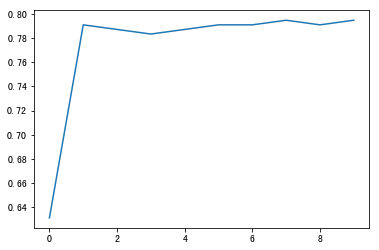

In [25]:
# 4.3 调优结果可视化
import matplotlib.pyplot as plt

plt.plot(depth_range, score)

plt.show()